In [14]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
# load dataset
df = pd.read_csv("../data/raw/Mall_Customers.csv")

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              189 non-null    int64 
 1   Genre                   189 non-null    object
 2   Age                     189 non-null    int64 
 3   Annual Income (k$)      189 non-null    int64 
 4   Spending Score (1-100)  189 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.5+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  189.000000  189.000000          189.000000              189.000000
mean    95.000000   39.026455           57.201058               50.084656
std     54.703748   14.295675           22.705839               25.451314
min      1.000000   18.000000           15.000000                1.000000
25%     48.000000   28.000000           40.000000               35.000000
50%     95.000000   36.000000    

In [8]:
# Data checks
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

Missing values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicate rows: 0


In [12]:
# percentage of zeros in each column
(((df == 0).sum() / len(df)) * 100).round(2)

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [16]:
# check distinct values for categorical columns
cat_cols = ['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
unique_values = {col: df[col].unique().tolist() for col in cat_cols}
pretty_json = json.dumps(unique_values, indent=2)
print(pretty_json)

{
  "Genre": [
    "Male",
    "Female"
  ],
  "Age": [
    19,
    21,
    20,
    23,
    31,
    22,
    35,
    64,
    30,
    67,
    58,
    24,
    37,
    52,
    25,
    46,
    54,
    29,
    45,
    40,
    60,
    53,
    18,
    49,
    42,
    36,
    65,
    48,
    50,
    27,
    33,
    59,
    47,
    51,
    69,
    70,
    63,
    43,
    68,
    32,
    26,
    57,
    38,
    55,
    34,
    66,
    39,
    44,
    28,
    56,
    41
  ],
  "Annual Income (k$)": [
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    23,
    24,
    25,
    28,
    29,
    30,
    33,
    34,
    37,
    38,
    39,
    40,
    42,
    43,
    44,
    46,
    47,
    48,
    49,
    50,
    54,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    67,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    81,
    85,
    86,
    87,
    88,
    93,
    97,
    98,
    99,
    101,
    103
  ],
  "Spending Score (1

In [18]:
df['Age'].value_counts()

Age
19    8
35    8
31    8
32    8
49    7
23    6
30    6
40    6
27    6
20    5
21    5
36    5
48    5
50    5
47    5
29    5
38    5
24    4
67    4
54    4
28    4
59    4
18    4
34    4
22    3
25    3
46    3
43    3
60    3
39    3
68    3
37    3
45    2
58    2
52    2
41    2
51    2
57    2
65    2
42    2
53    2
33    2
70    2
44    2
26    2
63    2
66    2
64    1
69    1
55    1
56    1
Name: count, dtype: int64

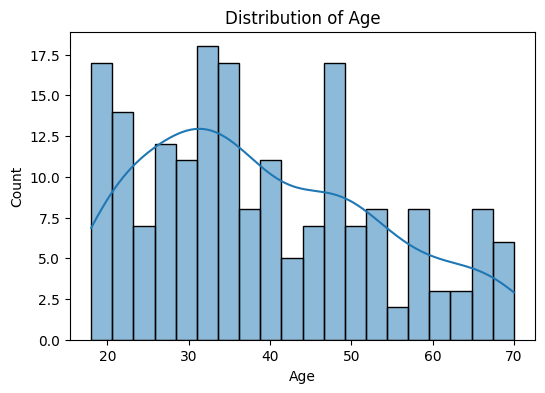

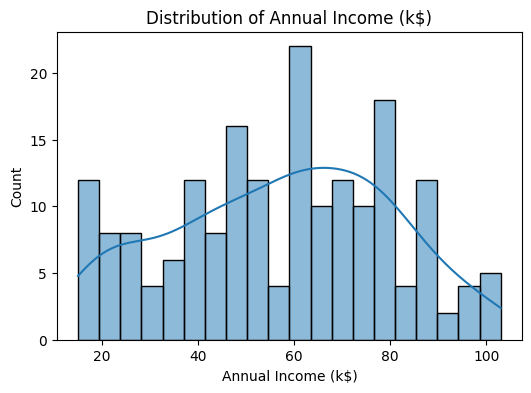

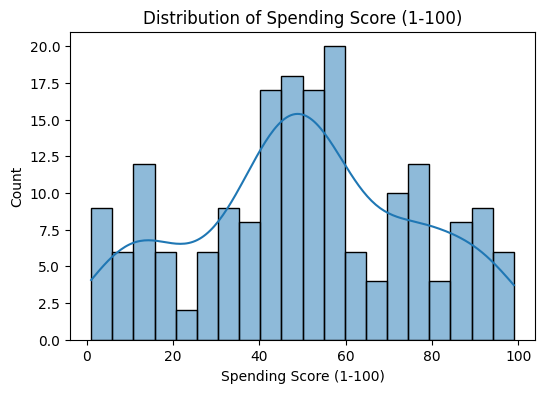

In [ ]:
# distribution plots
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()


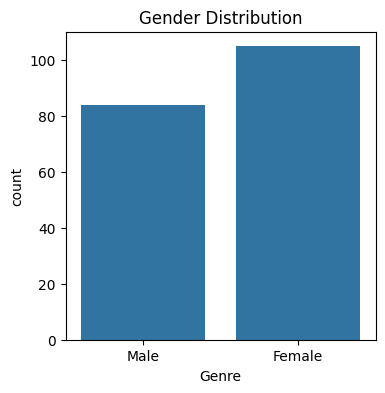

In [ ]:
# gender count
plt.figure(figsize=(4,4))
sns.countplot(x="Genre", data=df)
plt.title("Gender Distribution")
plt.show()


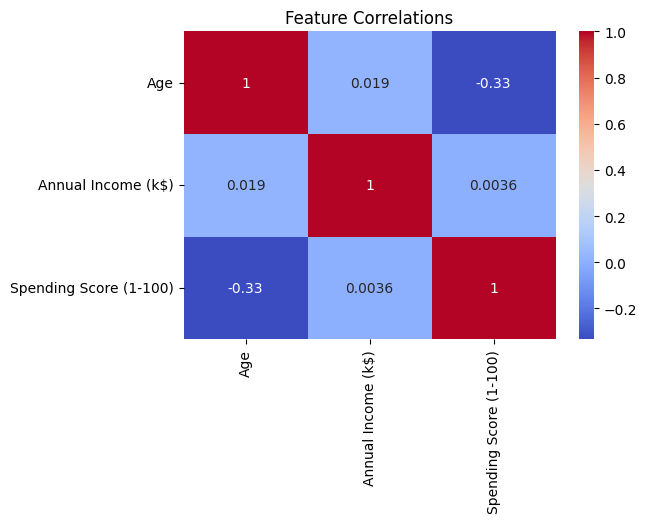

In [20]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


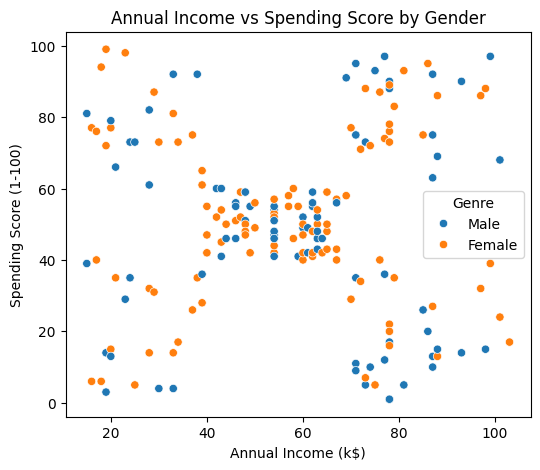

In [22]:
# income vs spending scatter
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre")
plt.title("Annual Income vs Spending Score by Gender")
plt.show()


In [24]:
req_numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [25]:
# Coefficient of variation
cv = ((df[req_numeric_columns].std()/df[req_numeric_columns].mean()) * 100).sort_values(ascending=False)
# Skewness of features
skew = df[req_numeric_columns].skew().sort_values(ascending=False)
# Kurtosis of features
kurt = df[req_numeric_columns].kurtosis().sort_values(ascending=False)
print("Coefficient of Variation:")
print(cv)
print("\nSkewness:")
print(skew)
print("\nKurtosis:")
print(kurt)

Coefficient of Variation:
Spending Score (1-100)    50.816590
Annual Income (k$)        39.694788
Age                       36.630729
dtype: float64

Skewness:
Age                       0.444751
Spending Score (1-100)   -0.041680
Annual Income (k$)       -0.118880
dtype: float64

Kurtosis:
Spending Score (1-100)   -0.724818
Age                      -0.779357
Annual Income (k$)       -0.859088
dtype: float64
